# Natural Language Processing with Disaster Tweets

here target is our dependent feature which we need to predict
- 1 means disaster tweets
- 0 means not disaster tweets 

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
df=pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [188]:
# checks for the missing value
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [189]:
df=df.dropna()  # there are only 61 na in keywords so i will drop it

In [190]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [191]:
# here i will drop id and location, which are not important for my model prediction
df.drop(['id','location'],axis=1,inplace=True)

In [ ]:
df.keywords.head(40) # %20 need to replace

In [192]:
# replacing %20 
# then replace double space by single space
df.keyword=df.keyword.apply(lambda x:re.sub(r'[^a-zA-z]',' ',x)).apply(lambda x:re.sub(r'\s+',' ',x))

In [193]:
df_pos=df[df.target==1]  # data frame with disaster tweets
df_neg=df[df.target==0]  # not disaster tweets

In [182]:
# top 20 value counts for tweets mentioning disaster
df_pos.keyword.value_counts().head(20)

outbreak             30
wreckage             28
oil spill            27
collision            26
evacuated            25
buildings on fire    25
derailment           25
earthquake           24
sandstorm            24
typhoon              24
airplane accident    24
drought              23
evacuation           23
suicide bomb         22
mass murder          22
derailed             22
debris               22
accident             21
flooding             21
wounded              21
Name: keyword, dtype: int64

In [185]:
px.bar(x=df_pos.keyword.value_counts().head(20).index,y=df_pos.keyword.value_counts().head(20),
      text=df_pos.keyword.value_counts().head(20),
      title='top 20 words for tweets mentioning disaster')

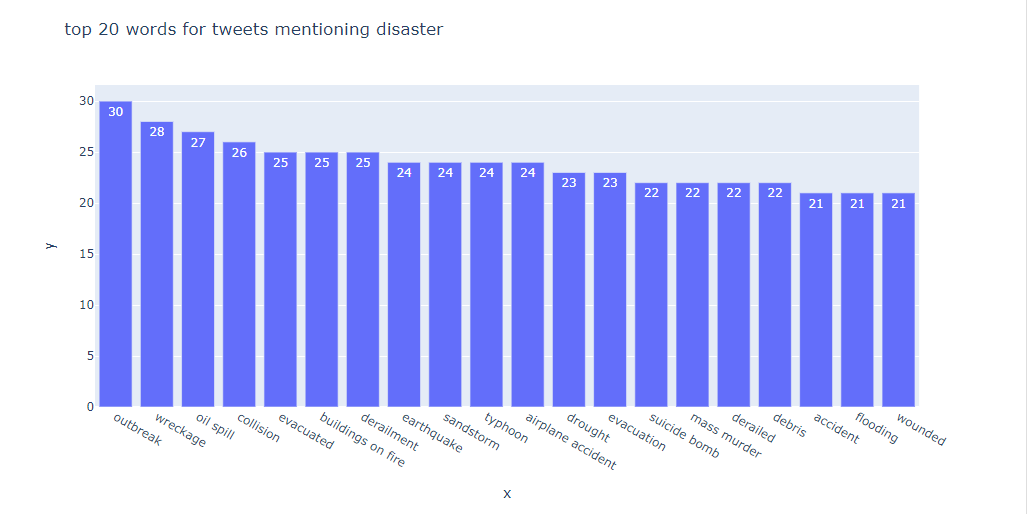

In [183]:
# top 20 value counts for tweets mentioning not disaster
df_neg.keyword.value_counts().head(20)

armageddon    28
ruin          27
harm          26
fear          25
upheaval      25
aftershock    25
bloody        25
screaming     25
inundated     24
siren         24
desolation    24
flattened     24
blight        24
deluge        24
demolish      23
danger        23
collide       23
panic         23
wreck         23
curfew        22
Name: keyword, dtype: int64

In [186]:
px.bar(x=df_neg.keyword.value_counts().head(20).index,y=df_neg.keyword.value_counts().head(20),
      text=df_neg.keyword.value_counts().head(20),
      title='top 20 words for tweets mentioning  not disaster')

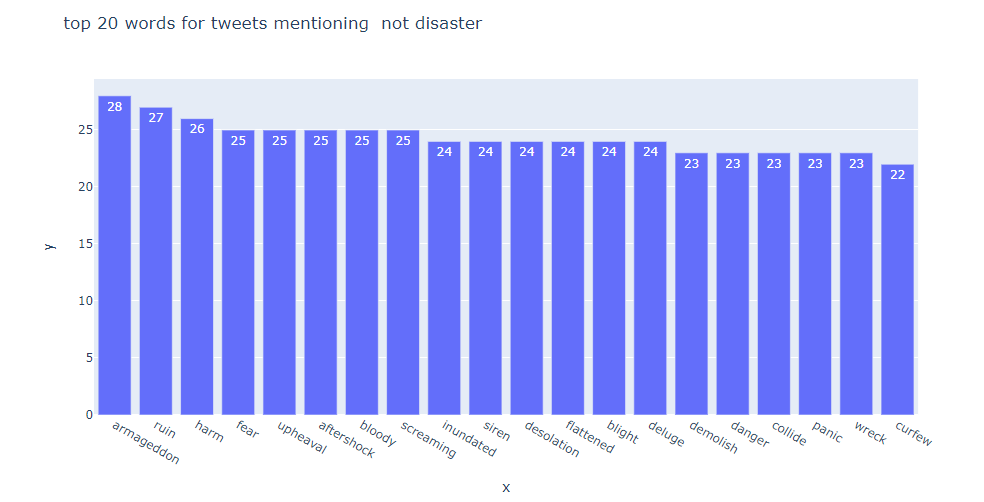

In [133]:
from wordcloud import WordCloud,STOPWORDS
def wordcloud(df,col):
    txt=' '.join(df[col])
    x=WordCloud(width=1000,height=500).generate(txt)
    plt.figure(figsize=(10,7))
    plt.imshow(x)
    plt.axis('off')
    plt.title('words cloud for keywords ',fontsize=15,fontweight='bold');

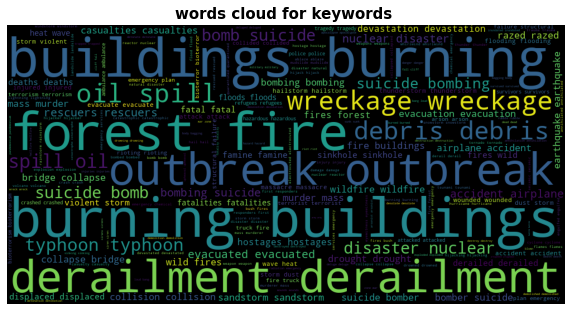

In [134]:
#word cloud for keywords having disaster tweets
wordcloud(df_pos,'keyword')

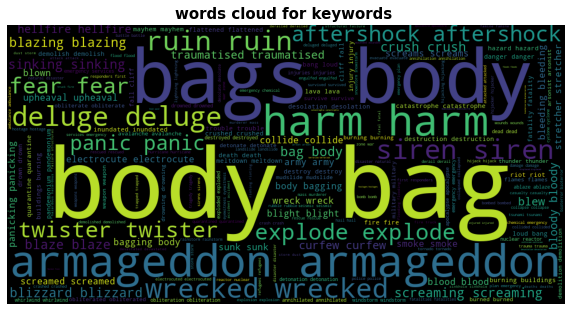

In [135]:
##word cloud for keywords having  not disaster tweets
wordcloud(df_neg,'keyword')

# Text Cleaning

In [194]:
#lets see text first
# you can notice index start from 31, as i have drop 61 keyword which have null value
df.text

31      @bbcmtd Wholesale Markets ablaze http://t.co/l...
32      We always try to bring the heavy. #metal #RT h...
33      #AFRICANBAZE: Breaking news:Nigeria flag set a...
34                     Crying out for more! Set me ablaze
35      On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
                              ...                        
7575    On the bright side I wrecked http://t.co/uEa0t...
7577    @widda16 ... He's gone. You can relax. I thoug...
7579    Three days off from work and they've pretty mu...
7580    #FX #forex #trading Cramer: Iger's 3 words tha...
7581    @engineshed Great atmosphere at the British Li...
Name: text, Length: 5080, dtype: object

In [195]:
df.text=df.text.apply(lambda x:x.lower())  # changing to lower case

In [196]:
import re
#remove word starting with @,#
df.text=df.text.apply(lambda x:re.sub(r'@\w+|#\w+',' ',x))
#remove http links
df.text=df.text.apply(lambda x:re.sub(r'http\S+',' ',x))
#  remove numeric character
df.text=df.text.apply(lambda x:re.sub(r'\d+',' ',x))
# remove  all not word character
df.text=df.text.apply(lambda x:re.sub(r'\W+',' ',x))
#remove double space
df.text=df.text.apply(lambda x:re.sub(r'\s+',' ',x))
#remove non sense single word
df.text=df.text.apply(lambda x:re.sub(r'\s\w\s',' ',x))
#remove space created by  removing a single word
df.text=df.text.apply(lambda x:re.sub(r'\s+',' ',x))
#remove non sense double word
df.text.apply(lambda x:re.sub(r'\s\w{2}\s',' ',x))
# remove any not word character with space
df.text=df.text.apply(lambda x:re.sub(r'[^a-zA-Z]',' ',x))
# remove empty space that is created by removing double word
df.text=df.text.apply(lambda x:re.sub(r'\s+',' ',x))
#repalcing single word
df.text=df.text.apply(lambda x:re.sub(r'\s\w\s',' ',x))
# remove empty space that is created by removing double word
df.text=df.text.apply(lambda x:re.sub(r'\s+',' ',x))
df.text.apply(lambda x:re.sub(r'\s\w{2}\s',' ',x))
# remove empty space that is created by removing double word
df.text=df.text.apply(lambda x:re.sub(r'\s+',' ',x))

In [197]:
import nltk
from nltk.corpus import stopwords

stop_words =stopwords.words('english')

In [198]:
df_pos=df[df.target==1]  # data frame with disaster tweets
df_neg=df[df.target==0]

In [199]:
txt=' '.join(df_pos['text'])


In [192]:
'so' in stop_words

True

In [201]:
stop_words = set(stopwords.words('english') + ['okinawan','af','st','bsg','tote','okayyyyyy','ok',
                                              'lmfaoooo','via','grrrr','oooooohhhh','oooh ',
                                              'mmmmmm','ooh','like','u','amp'])

In [202]:
from wordcloud import WordCloud,STOPWORDS
def wordcloud(df,col):
    txt=' '.join(df[col])
    x=WordCloud(width=1000,height=500,stopwords=stop_words,random_state=0).generate(txt)
    plt.figure(figsize=(10,7))
    plt.imshow(x)
    plt.axis('off')
    plt.title('words cloud for text ',fontsize=15,fontweight='bold');

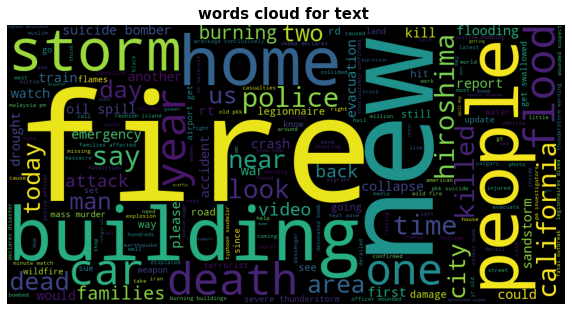

In [203]:
# word cloud for text with disaster tweet
wordcloud(df_pos,'text')

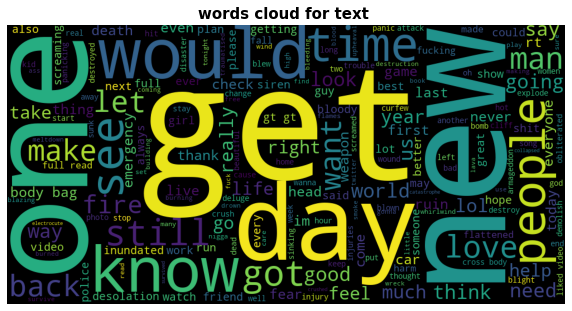

In [204]:
# word cloud for text with not  disaster tweet
wordcloud(df_neg,'text')

In [140]:
X=df['text']

In [78]:
TfidfVectorizer?

In [106]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [112]:
#def lemitizer(text):
    #return [word.lemma_ for word in nlp(text)]

In [116]:
df.text.apply(lemitizer)

31                         [ , wholesale, market, ablaze]
32               [we, always, try, to, bring, the, heavy]
33      [ , break, news, nigeria, flag, set, ablaze, i...
34                  [cry, out, for, more, set, I, ablaze]
35      [on, plus, side, look, at, the, sky, last, nig...
                              ...                        
7578                           [ , and, wreck, you, both]
7579    [three, day, off, from, work, and, they, ve, p...
7580    [ , cramer, iger, word, that, wreck, disney, s...
7581    [ , great, atmosphere, at, the, british, lion,...
7582    [cramer, iger, word, that, wreck, disney, stoc...
Name: text, Length: 7552, dtype: object

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english')
X_t=tf.fit_transform(X)

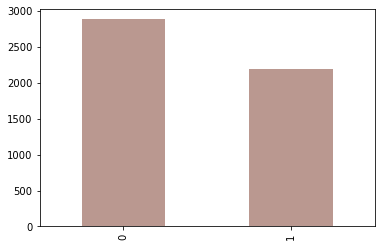

In [208]:
# little imbalance data set
df.target.value_counts().plot(kind='bar',color='#773322',alpha=0.5);

# Handling imbalance data set

In [30]:
from imblearn.over_sampling import RandomOverSampler
rs= RandomOverSampler()

In [142]:
X,y=rs.fit_resample(X_t,df.target)

In [143]:
#now we have balanced data set
y.value_counts()

0    2884
1    2884
Name: target, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42,shuffle=True,stratify=y)


In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
model=RandomForestClassifier(random_state=0)

In [146]:
def score(classifier):
    print('Model Summary')
    print('#'*60)
    model=classifier
    model.fit(X_train,y_train)
    print(f' train score {model.score(X_train,y_train)}')
    print('*'*60)
    print(f' test score {model.score(X_test,y_test)}')
    print('*'*60)
    print('Classification Report')
    print('*'*60)
    print(classification_report(model.predict(X_test),y_test))
    print('*'*60)
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True,fmt='d',cmap="YlGnBu",
            cbar=False,annot_kws={'fontweight':'bold','size':15})
    plt.title('confusion matrix')
    plt.xlabel('predicted')
    plt.ylabel('actual');
    

Model Summary
############################################################
 train score 0.9861291720849589
************************************************************
 test score 0.8197573656845754
************************************************************
Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       617
           1       0.79      0.84      0.81       537

    accuracy                           0.82      1154
   macro avg       0.82      0.82      0.82      1154
weighted avg       0.82      0.82      0.82      1154

************************************************************


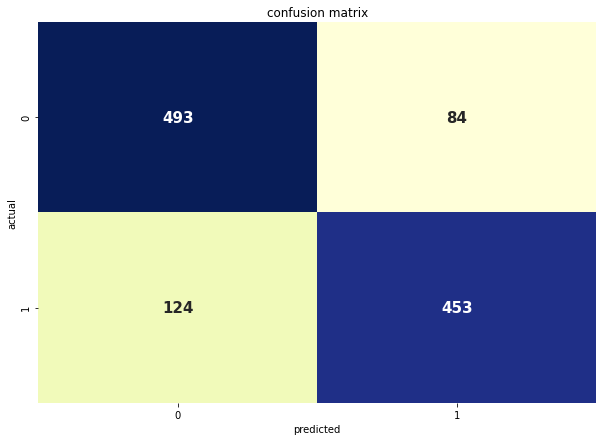

In [147]:
score(RandomForestClassifier())

Model Summary
############################################################
 train score 0.8593411356740356
************************************************************
 test score 0.7339688041594454
************************************************************
Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       558
           1       0.75      0.73      0.74       596

    accuracy                           0.73      1154
   macro avg       0.73      0.73      0.73      1154
weighted avg       0.73      0.73      0.73      1154

************************************************************


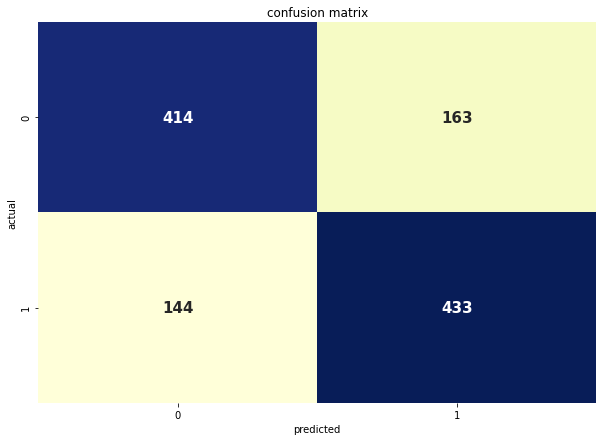

In [148]:
from sklearn.neighbors import KNeighborsClassifier
score(KNeighborsClassifier())

Model Summary
############################################################
 train score 0.9165583008235804
************************************************************
 test score 0.8058925476603119
************************************************************
Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       537
           1       0.84      0.79      0.81       617

    accuracy                           0.81      1154
   macro avg       0.81      0.81      0.81      1154
weighted avg       0.81      0.81      0.81      1154

************************************************************


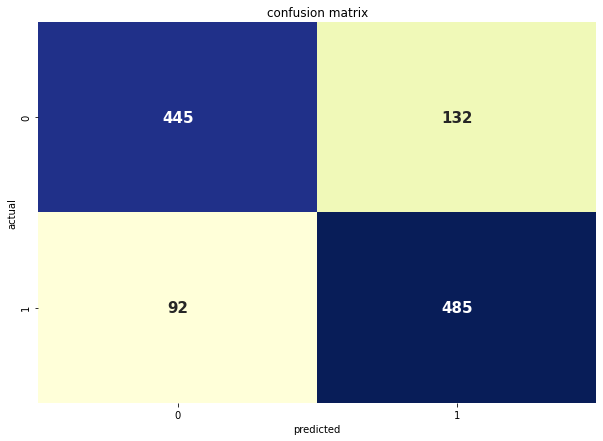

In [163]:
from sklearn.naive_bayes import MultinomialNB
score(MultinomialNB())

Model Summary
############################################################
 train score 0.9822151532677849
************************************************************
 test score 0.7624277456647399
************************************************************
Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       818
           1       0.79      0.75      0.77       912

    accuracy                           0.76      1730
   macro avg       0.76      0.76      0.76      1730
weighted avg       0.76      0.76      0.76      1730

************************************************************


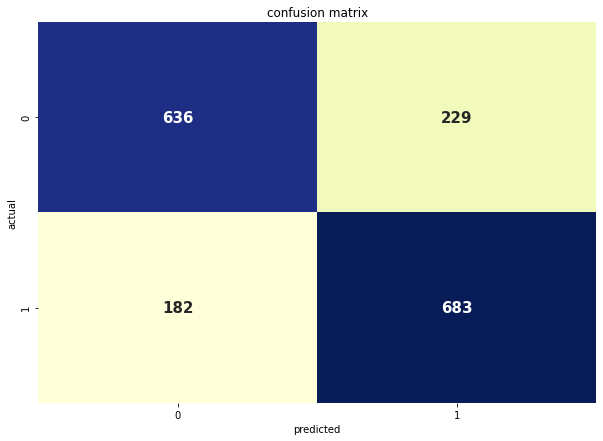

In [128]:
from sklearn.neural_network import MLPClassifier
score(MLPClassifier())

Model Summary
############################################################
 train score 0.9861291720849589
************************************************************
 test score 0.841421143847487
************************************************************
Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       608
           1       0.81      0.86      0.84       546

    accuracy                           0.84      1154
   macro avg       0.84      0.84      0.84      1154
weighted avg       0.84      0.84      0.84      1154

************************************************************


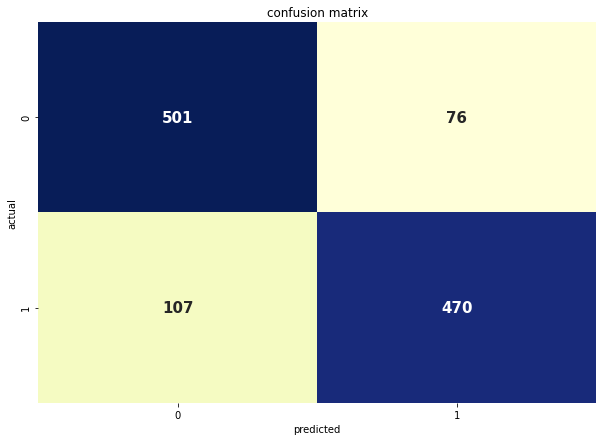

In [150]:
from sklearn.svm import SVC
score(SVC(C=100))

In [173]:
LogisticRegression?

Model Summary
############################################################
 train score 0.91222366710013
************************************************************
 test score 0.8275563258232236
************************************************************
Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       590
           1       0.82      0.84      0.83       564

    accuracy                           0.83      1154
   macro avg       0.83      0.83      0.83      1154
weighted avg       0.83      0.83      0.83      1154

************************************************************


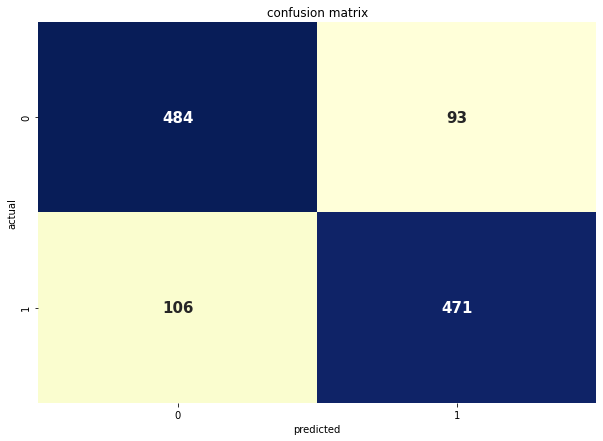

In [178]:
from sklearn.linear_model import LogisticRegression
score(LogisticRegression())

# Hypertunning

# Random Forest Classifier

In [54]:
model=RandomForestClassifier()
params={
    'n_estimators':[int(x) for x in np.linspace(100,2500,20)],
    'max_depth':range(1,30)
    #'min_samples_split':[2,4,8,16,32,64,128]
    
}
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
kfold=KFold(n_splits=5,shuffle=True,random_state=0)

In [55]:
random_search=RandomizedSearchCV(estimator=model,param_distributions=params,cv=kfold,n_iter=5,verbose=1)

In [56]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': range(1, 30),
                                        'n_estimators': [100, 226, 352, 478,
                                                         605, 731, 857, 984,
                                                         1110, 1236, 1363, 1489,
                                                         1615, 1742, 1868, 1994,
                                                         2121, 2247, 2373,
                                                         2500]},
                   verbose=1)

In [57]:
random_search.best_score_

0.7478007572343854

In [58]:
random_search.best_params_

{'n_estimators': 984, 'max_depth': 28}

# SVM

In [73]:
params = [{'kernel': ['rbf','sigmoid','poly'], 
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
               'C': np.linspace(1,10000,100)}]
model=SVC(random_state=42)
random_search=RandomizedSearchCV(estimator=model,param_distributions=params,cv=kfold,n_iter=5,verbose=1)

In [74]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=SVC(random_state=42), n_iter=5,
                   param_distributions=[{'C': array([1.000e+00, 1.020e+02, 2.030e+02, 3.040e+02, 4.050e+02, 5.060e+02,
       6.070e+02, 7.080e+02, 8.090e+02, 9.100e+02, 1.011e+03, 1.112e+03,
       1.213e+03, 1.314e+03, 1.415e+03, 1.516e+03, 1.617e+03, 1.718e+03,
       1.819e+03, 1.920e+03, 2.021e+03...
       7.273e+03, 7.374e+03, 7.475e+03, 7.576e+03, 7.677e+03, 7.778e+03,
       7.879e+03, 7.980e+03, 8.081e+03, 8.182e+03, 8.283e+03, 8.384e+03,
       8.485e+03, 8.586e+03, 8.687e+03, 8.788e+03, 8.889e+03, 8.990e+03,
       9.091e+03, 9.192e+03, 9.293e+03, 9.394e+03, 9.495e+03, 9.596e+03,
       9.697e+03, 9.798e+03, 9.899e+03, 1.000e+04]),
                                         'gamma': [0.0001, 0.001, 0.01, 0.1,
                                                   0.2, 0.5, 0.6, 0.9],
                                         'kernel': ['rbf', 'sigmoid

In [75]:
random_search.best_score_

0.7319690683738107

In [76]:
random_search.best_params_

{'kernel': 'sigmoid', 'gamma': 0.9, 'C': 9192.0}